# Predicting the mpg based on other features using Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
auto=pd.read_fwf('auto-mpg.csv',names=columns)

In [59]:
auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,"""chevrolet impala"""
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,"""pontiac catalina"""
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,"""amc ambassador dpl"""


In [13]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [15]:
auto.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

<AxesSubplot:>

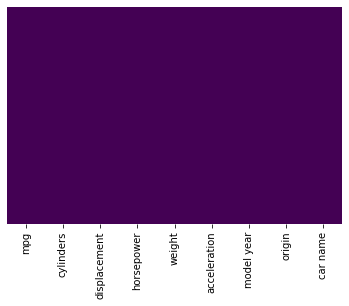

In [16]:
sns.heatmap(auto.isnull(),yticklabels=False,cbar=False,cmap='viridis') #to check for missing values

In [60]:
auto['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [61]:
auto.replace('?',0,inplace=True)

In [64]:
auto['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', 0, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [65]:
auto['horsepower']=auto['horsepower'].astype(float)

In [66]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


<AxesSubplot:>

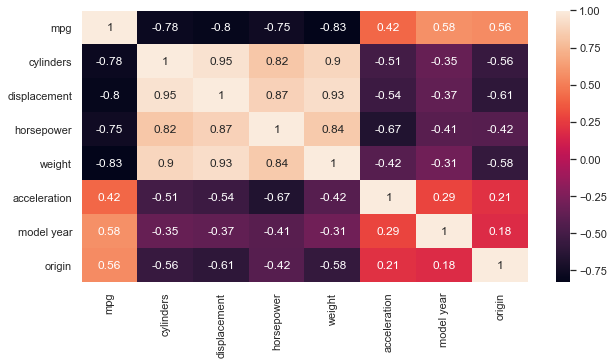

In [67]:
plt.figure(figsize=(10,5))
sns.heatmap(auto.corr(),annot=True)

In [22]:
sns.set_theme()

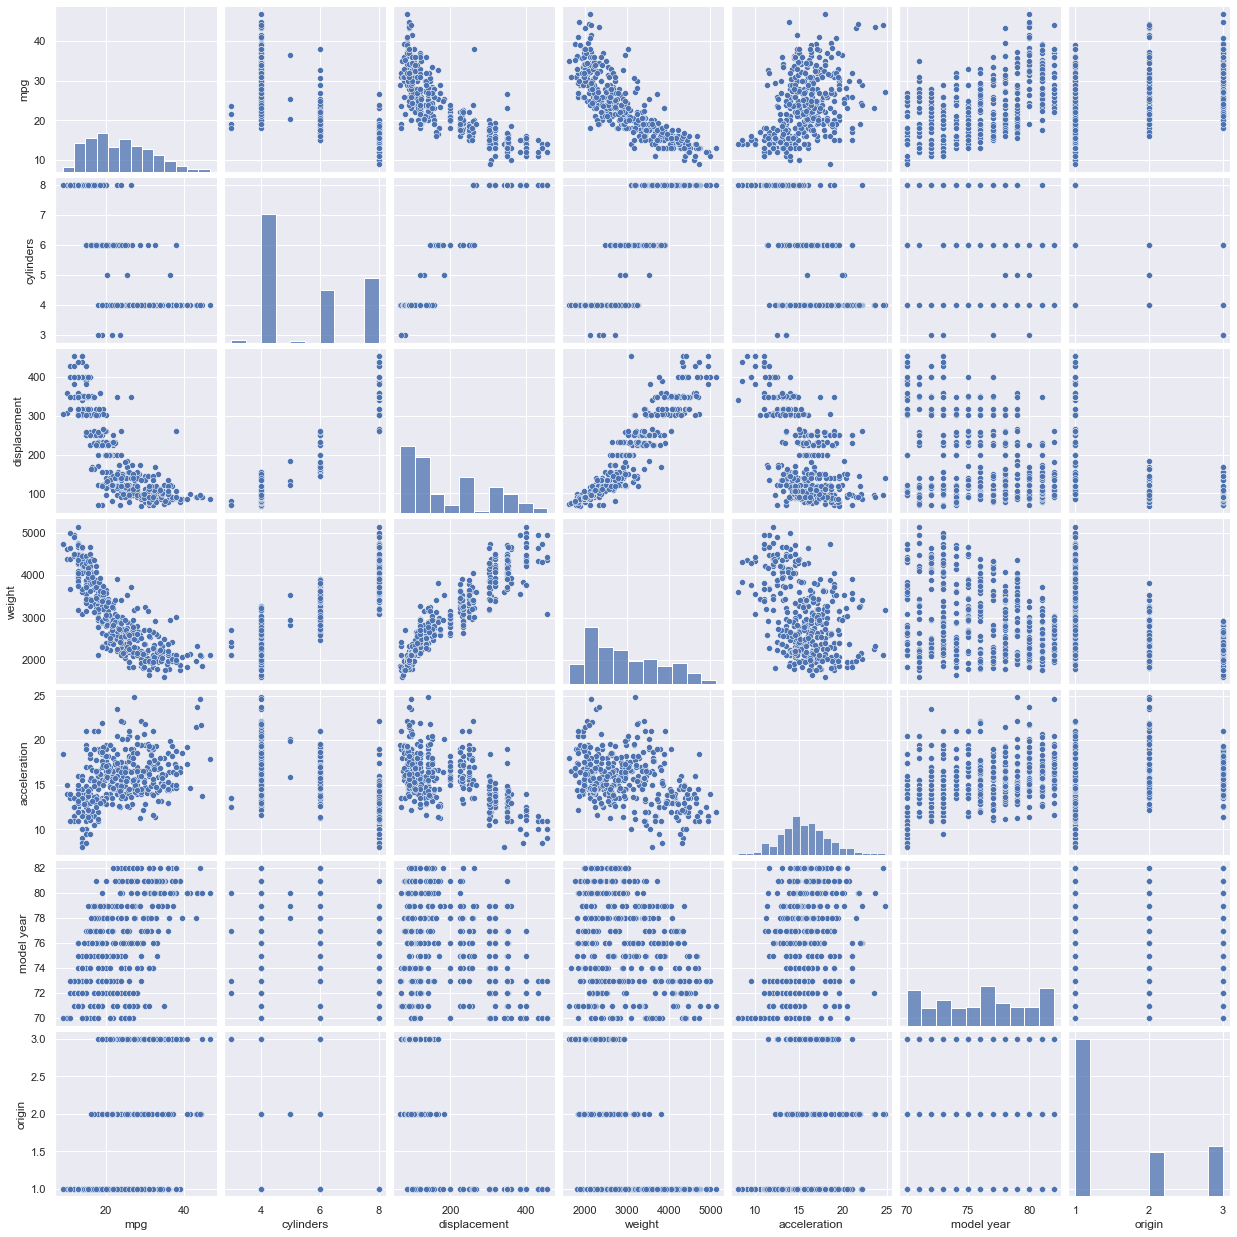

In [23]:
sns.pairplot(auto)

In [68]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x=auto.drop(['mpg','car name'],axis=1) #the feature variables are all columns except the mpg column which is the target variable
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1
394,4,97.0,52.0,2130.0,24.6,82,2
395,4,135.0,84.0,2295.0,11.6,82,1
396,4,120.0,79.0,2625.0,18.6,82,1


In [72]:
y=auto['mpg']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
model=LinearRegression()

In [76]:
model.fit(x_train,y_train)

LinearRegression()

In [77]:
pred=model.predict(x_test)

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE is : ',mean_absolute_error(y_test,pred))
print('MSE is : ',mean_squared_error(y_test,pred))
print('R-squared score is : ',r2_score(y_test,pred))

MAE is :  2.6086488743758736
MSE is :  12.525306858611833
R-squared score is :  0.7894465815985112


In [81]:
print('The intercept is : ',model.intercept_)

The intercept is :  -12.985729309745498


In [82]:
model.coef_

array([-0.47206547,  0.01573244, -0.00541221, -0.00663278,  0.14181887,
        0.68495433,  1.2447653 ])

In [88]:
c=pd.DataFrame(model.coef_,x.columns,columns=['coefficient'])
print('The coefficient or the weight of the features are listed below:')
c

The coefficient or the weight of the features are listed below:


,coefficient
cylinders,-0.472065
displacement,0.015732
horsepower,-0.005412
weight,-0.006633
acceleration,0.141819
model year,0.684954
origin,1.244765


<AxesSubplot:xlabel='mpg'>

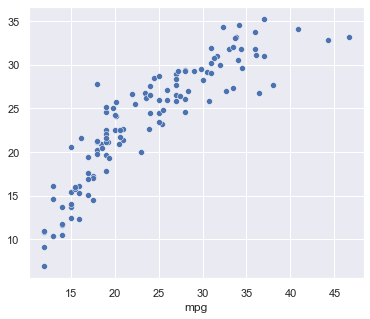

In [93]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test,y=pred)

<AxesSubplot:xlabel='mpg'>

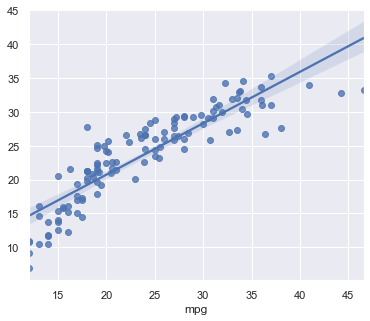

In [95]:
plt.figure(figsize=(6,5))
sns.regplot(x=y_test,y=pred)

# Finding the best fit line

In [100]:
m= 0
c= 0

In [101]:
L=0.0001
iter=1000

In [102]:
n=float(len(y_test))

In [115]:
for i in range(iter):
    
    y_pred= m*y_test+c
    D_m= (-2/n)*sum(y_test*(pred-y_pred))
    D_c=(-2/n)*sum(pred-y_pred)
    
    m=m-L*D_m
    c=c-L*D_c
    
print(" optimal m value is : ",m)
print("optimal c value is : ", c)

 optimal m value is :  0.9708320495233503
optimal c value is :  -0.037760445664578965


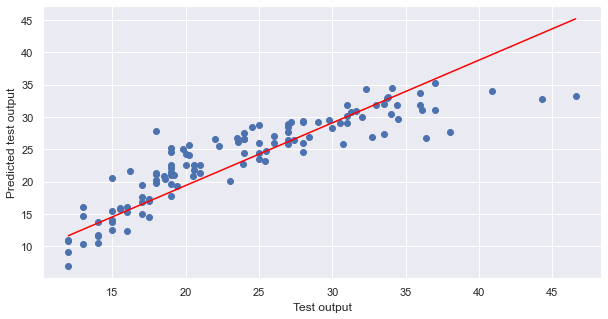

In [116]:
y_pred = m*y_test+ c
plt.figure(figsize=(10,5))
plt.scatter(y_test, pred) 
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red')  # regression line
plt.xlabel("Test output")
plt.ylabel("Predicted test output")
plt.show()